In [ ]:
# Model testing and verification
# Code file, rel. 3.0

**Data set 1: training.csv**

Field Descriptions:

ID Variable

* cust - simulated customer ID (does not link to any real customer data)

Predictors

* segment - Enterprise or Commercial customer
* vertical - Industry (e.g. Financial Services, Manufacturing)
* sub_vertical - A more granular version of vertical (e.g. Discrete Manufacturing)
* country - The raw data includes 14 distinct country values (e.g. USA)
* bookings - total customer bookings (across all products) with Cisco in FY 2018 (not real values)

Outcome

* purchase - a TRUE/FALSE indicator of whether the customer purchased a DNA-Center License in 2019 (not real values)

**Data set 1: testing.csv**

* The testing.csv file contains a smaller holdout sample of customers. 
* For these customers, we do not know whether a DNA-Center license was purchased. 
* The fields are exactly the same as in training.csv, except the outcome field (purchase), is not included.

**Tasks**

* Q1: Load training.csv

* Q2: Explore the categorical predictors (segment, vertical, sub_vertical, country) for data quality issues.Using your best judgment given the data and Field Descriptions, fix these data quality issues

* Q3: Using graphical analysis and/or numeric summaries, explore the relationship between the 5 predictors (segment, vertical, sub_vertical, country, and bookings) and the outcome of interest (purchase).

* Q4: Use a statistical modeling method or machine learning algorithm to estimate the effects of the predictors on the outcome. When choosing a modeling approach, select a model that will yield a probability of purchase (see Q5 below) rather than an approach that yields only a binary classification.

* Q5: Using your model or algorithm to estimate the probability of purchase for each customer in testing.csv.

In [1]:
import pandas as pd
import statistics as stat
from pandas import read_csv
from matplotlib import pyplot

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [67]:
#Reading raw data
file = 'training.csv'
data = pd.read_csv(file, sep=',', header=0, parse_dates=True)
data

,cust,segment,vertical,sub_vertical,country,bookings,purchase
0,d66648938c68318a8dad17a77f0c8327,Commercial,Manufacturing,Hi-tech/Computers Manufacturing,UNITED STATES,103356,False
1,dcce1fa11f27a6a2c57c8aacf5f0219c,Commercial,Retail,Other (Retail),UNITED STATES,62952,True
2,136b88d1b2aea8ae74cbfe111830af69,Commercial,Retail,Other (Retail),ITALY,2886,True
3,674c6fcb90b5d29765f266007ad423e1,Enterprise,Retail,Other (Retail),UNITED STATES,80253,True
4,97c72b3833ce8ef5154826fc128522b1,Commercial,Health Care,Providers,AUSTRALIA,29424,False
...,...,...,...,...,...,...,...
27338,d95a7c1779b6165d0302e8e191243239,Enterprise,Professional Services,Construction/Engineering,UNITED STATES,4142,True
27339,24113cecc9177b25a3d22c84f9d6ceec,Enterprise,Government,Federal/Central Government,CHINA,6233,False
27340,c082a0889baf15ce697b044914e3ed44,Enterprise,Manufacturing,Discrete Manufacturing,UNITED STATES,4003,False
27341,9a28b51f3f5d510a98c8b92446ea9a00,Commercial,Retail,"Consumer Services(dry cleaners,video rental,etc)",UNITED STATES,1471,True


In [68]:
data["cust"].describe()

count                                27343
unique                               27343
top       d66648938c68318a8dad17a77f0c8327
freq                                     1
Name: cust, dtype: object

In [69]:
data["segment"].describe()

count          27343
unique             5
top       Enterprise
freq           16623
Name: segment, dtype: object

In [70]:
data["vertical"].describe()

count                     27343
unique                        8
top       Professional Services
freq                       5553
Name: vertical, dtype: object

In [71]:
data["sub_vertical"].describe()

count                          27343
unique                            15
top       Federal/Central Government
freq                            3559
Name: sub_vertical, dtype: object

In [72]:
data["country"].describe()

count             27343
unique               14
top       UNITED STATES
freq              13810
Name: country, dtype: object

In [73]:
data["bookings"].describe()

count       27343
unique      22474
top       unknown
freq           73
Name: bookings, dtype: object

In [74]:
#Checking "segment" column
data["segment"].value_counts()

segment
Enterprise             16623
Commercial             10471
commercial               246
enterprise                 2
enterprise customer        1
Name: count, dtype: int64

In [75]:
#Fixing different names for the same country
def fix_segment(column):
    results = {}
    results['column'] = column.name

    #Replacing different names for the same segment
    segment_column = []
    for value in column:
        if value == "enterprise customer":
            segment_column.append("enterprise")
        else:
            segment_column.append(str(value).lower())

    #Creating new column data with 'fixed' entries
    results['data'] = segment_column

    return results  

#Replacing data with new value
temp_data = data.apply(fix_segment)
for m in temp_data:
    data[m['column']] = m['data']

In [76]:
data["segment"].value_counts()

segment
enterprise    16626
commercial    10717
Name: count, dtype: int64

In [77]:
#Removing "cust" column as unique, removing "bookings" column which has too many unique values
#Encoding "segment", "vertical", "sub_vertical" and "purchase" columns
data = data.drop("cust", axis=1)
data = data.drop("bookings", axis=1)
data = data.drop("segment", axis=1)

encode = LabelEncoder()

#data["segment"] = data["segment"].astype("category")
#data["segment"] = encode.fit_transform(data.segment)

data["vertical"] = data["vertical"].astype("category")
data["vertical"] = encode.fit_transform(data.vertical)

data["sub_vertical"] = data["sub_vertical"].astype("category")
data["sub_vertical"] = encode.fit_transform(data.sub_vertical)

data["purchase"] = data["purchase"].astype("category")
data["purchase"] = encode.fit_transform(data.purchase)


data

,vertical,sub_vertical,country,purchase
0,3,6,united states,0
1,5,10,united states,1
2,5,10,italy,1
3,5,10,united states,1
4,2,12,australia,0
...,...,...,...,...
27338,4,0,united states,1
27339,1,5,china,0
27340,3,4,united states,0
27341,5,3,united states,1


In [78]:
#Checking "country" column
data["country"].value_counts()

country
united states     13810
united kingdom     2246
china              1836
germany            1683
canada             1277
japan              1228
australia          1183
france              983
italy               787
mexico              733
india               705
brazil              451
usa                 347
deutschland          74
Name: count, dtype: int64

In [79]:
#Fixing different names for the same country
def fix(column):
    results = {}
    results['column'] = column.name

    #Replacing different names for the same country
    country_column = []
    for value in column:
        if value == "usa":
            country_column.append("united states")
        elif value == "deutschland":
            country_column.append("germany")
        else:
            country_column.append(value)

    #Creating new column data with 'fixed' entries
    results['data'] = country_column

    return results  

#Replacing data with new value
temp_data = data.apply(fix)
for m in temp_data:
    data[m['column']] = m['data']

In [80]:
#Encoding "country" column 
data["country"] = data["country"].astype("category")
data["country"] = encode.fit_transform(data.country)

data

,vertical,sub_vertical,country,purchase
0,3,6,11,0
1,5,10,11,1
2,5,10,7,1
3,5,10,11,1
4,2,12,0,0
...,...,...,...,...
27338,4,0,11,1
27339,1,5,3,0
27340,3,4,11,0
27341,5,3,11,1


In [81]:
data["country"].value_counts()

country
11    14157
10     2246
3      1836
5      1757
2      1277
8      1228
0      1183
4       983
7       787
9       733
6       705
1       451
Name: count, dtype: int64

In [82]:
#Scaling all cloumns
scaler = MinMaxScaler()

data['vert_scaled'] = scaler.fit_transform(data['vertical'].values.reshape(-1,1))
data = data.drop("vertical", axis=1)
data['sub_scaled'] = scaler.fit_transform(data['sub_vertical'].values.reshape(-1,1))
data = data.drop("sub_vertical", axis=1)
data['country_scaled'] = scaler.fit_transform(data['country'].values.reshape(-1,1))
data = data.drop("country", axis=1)

data

,purchase,vert_scaled,sub_scaled,country_scaled
0,0,0.428571,0.428571,1.000000
1,1,0.714286,0.714286,1.000000
2,1,0.714286,0.714286,0.636364
3,1,0.714286,0.714286,1.000000
4,0,0.285714,0.857143,0.000000
...,...,...,...,...
27338,1,0.571429,0.000000,1.000000
27339,0,0.142857,0.357143,0.272727
27340,0,0.428571,0.285714,1.000000
27341,1,0.714286,0.214286,1.000000


In [83]:
data['country_scaled'].describe()

count    27343.000000
mean         0.749991
std          0.329987
min          0.000000
25%          0.454545
50%          1.000000
75%          1.000000
max          1.000000
Name: country_scaled, dtype: float64

In [84]:
len(list(data["country_scaled"].unique()))

12

In [85]:
data['vert_scaled'].describe()

count    27343.000000
mean         0.500687
std          0.293311
min          0.000000
25%          0.285714
50%          0.571429
75%          0.714286
max          1.000000
Name: vert_scaled, dtype: float64

In [86]:
len(list(data["vert_scaled"].unique()))

8

In [87]:
data['sub_scaled'].describe()

count    27343.000000
mean         0.539673
std          0.287166
min          0.000000
25%          0.357143
50%          0.571429
75%          0.785714
max          1.000000
Name: sub_scaled, dtype: float64

In [88]:
len(list(data["sub_scaled"].unique()))

15

In [89]:
data.describe()

,purchase,vert_scaled,sub_scaled,country_scaled
count,27343.000000,27343.000000,27343.000000,27343.000000
mean,0.351095,0.500687,0.539673,0.749991
std,0.477321,0.293311,0.287166,0.329987
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.285714,0.357143,0.454545
50%,0.000000,0.571429,0.571429,1.000000
75%,1.000000,0.714286,0.785714,1.000000
max,1.000000,1.000000,1.000000,1.000000


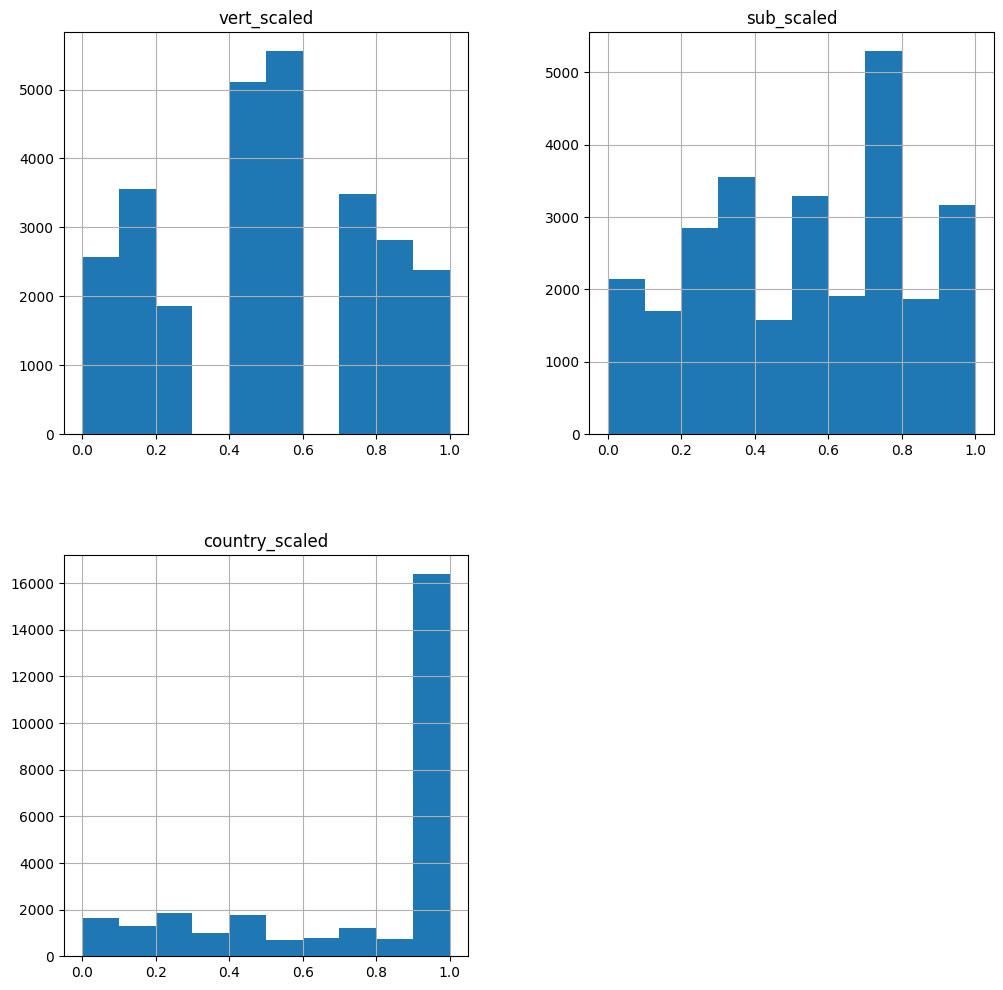

In [90]:
#Visualization
plotting_data = data.drop("purchase", axis=1)
plotting_data.hist(figsize=(12,12)) 
pyplot.show()

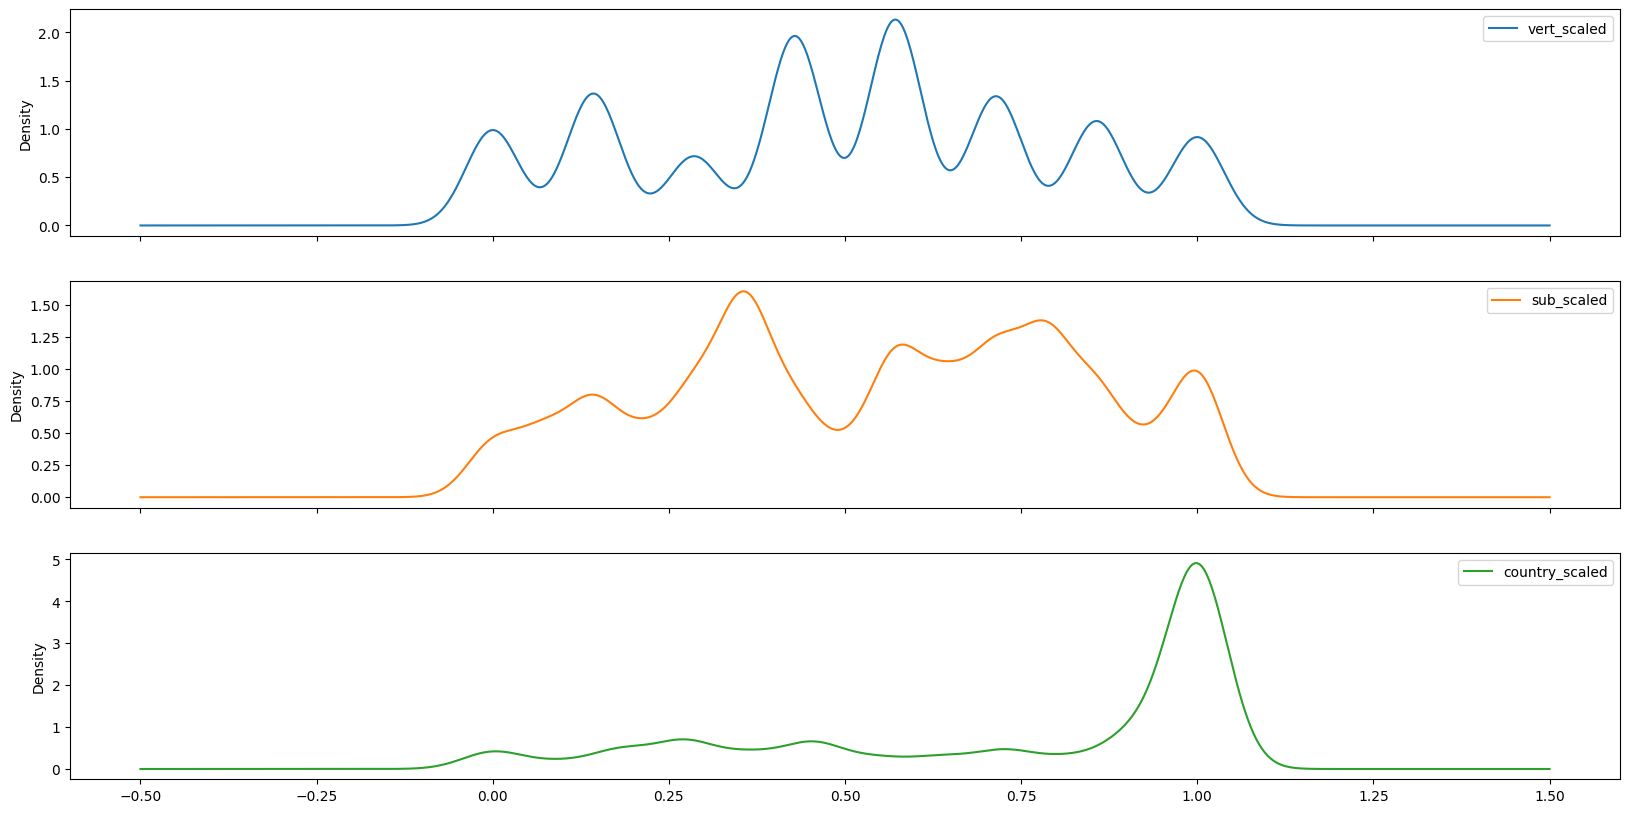

In [91]:
plotting_data.plot.kde(figsize=(20,10),subplots=True)
pyplot.show()

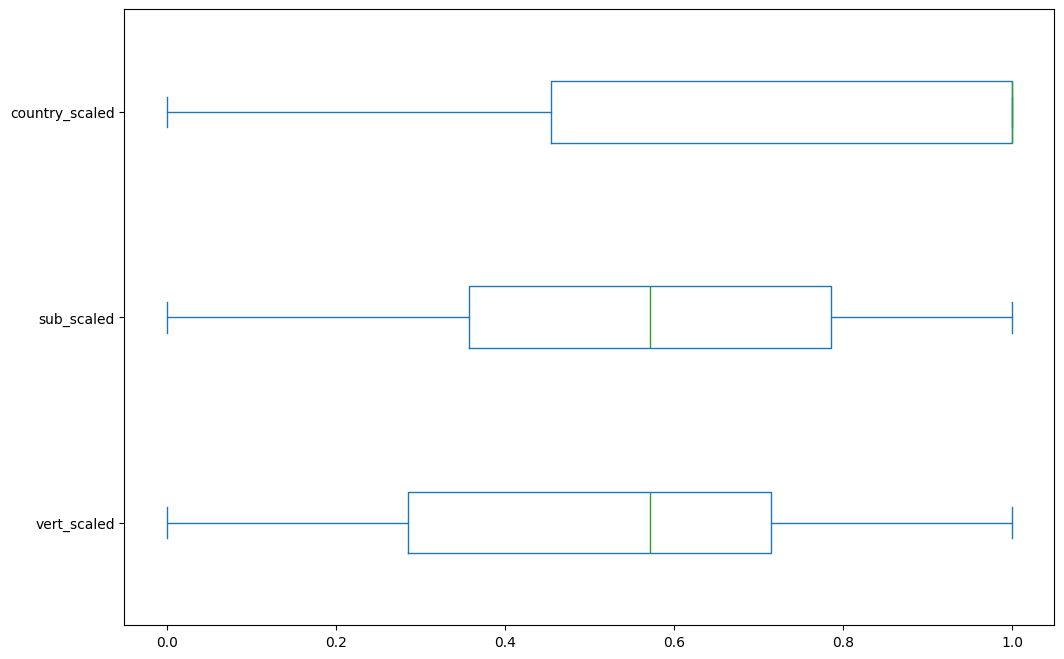

In [92]:
plotting_data.plot.box(vert=False, figsize=(12,8))
pyplot.show()

<Axes: >

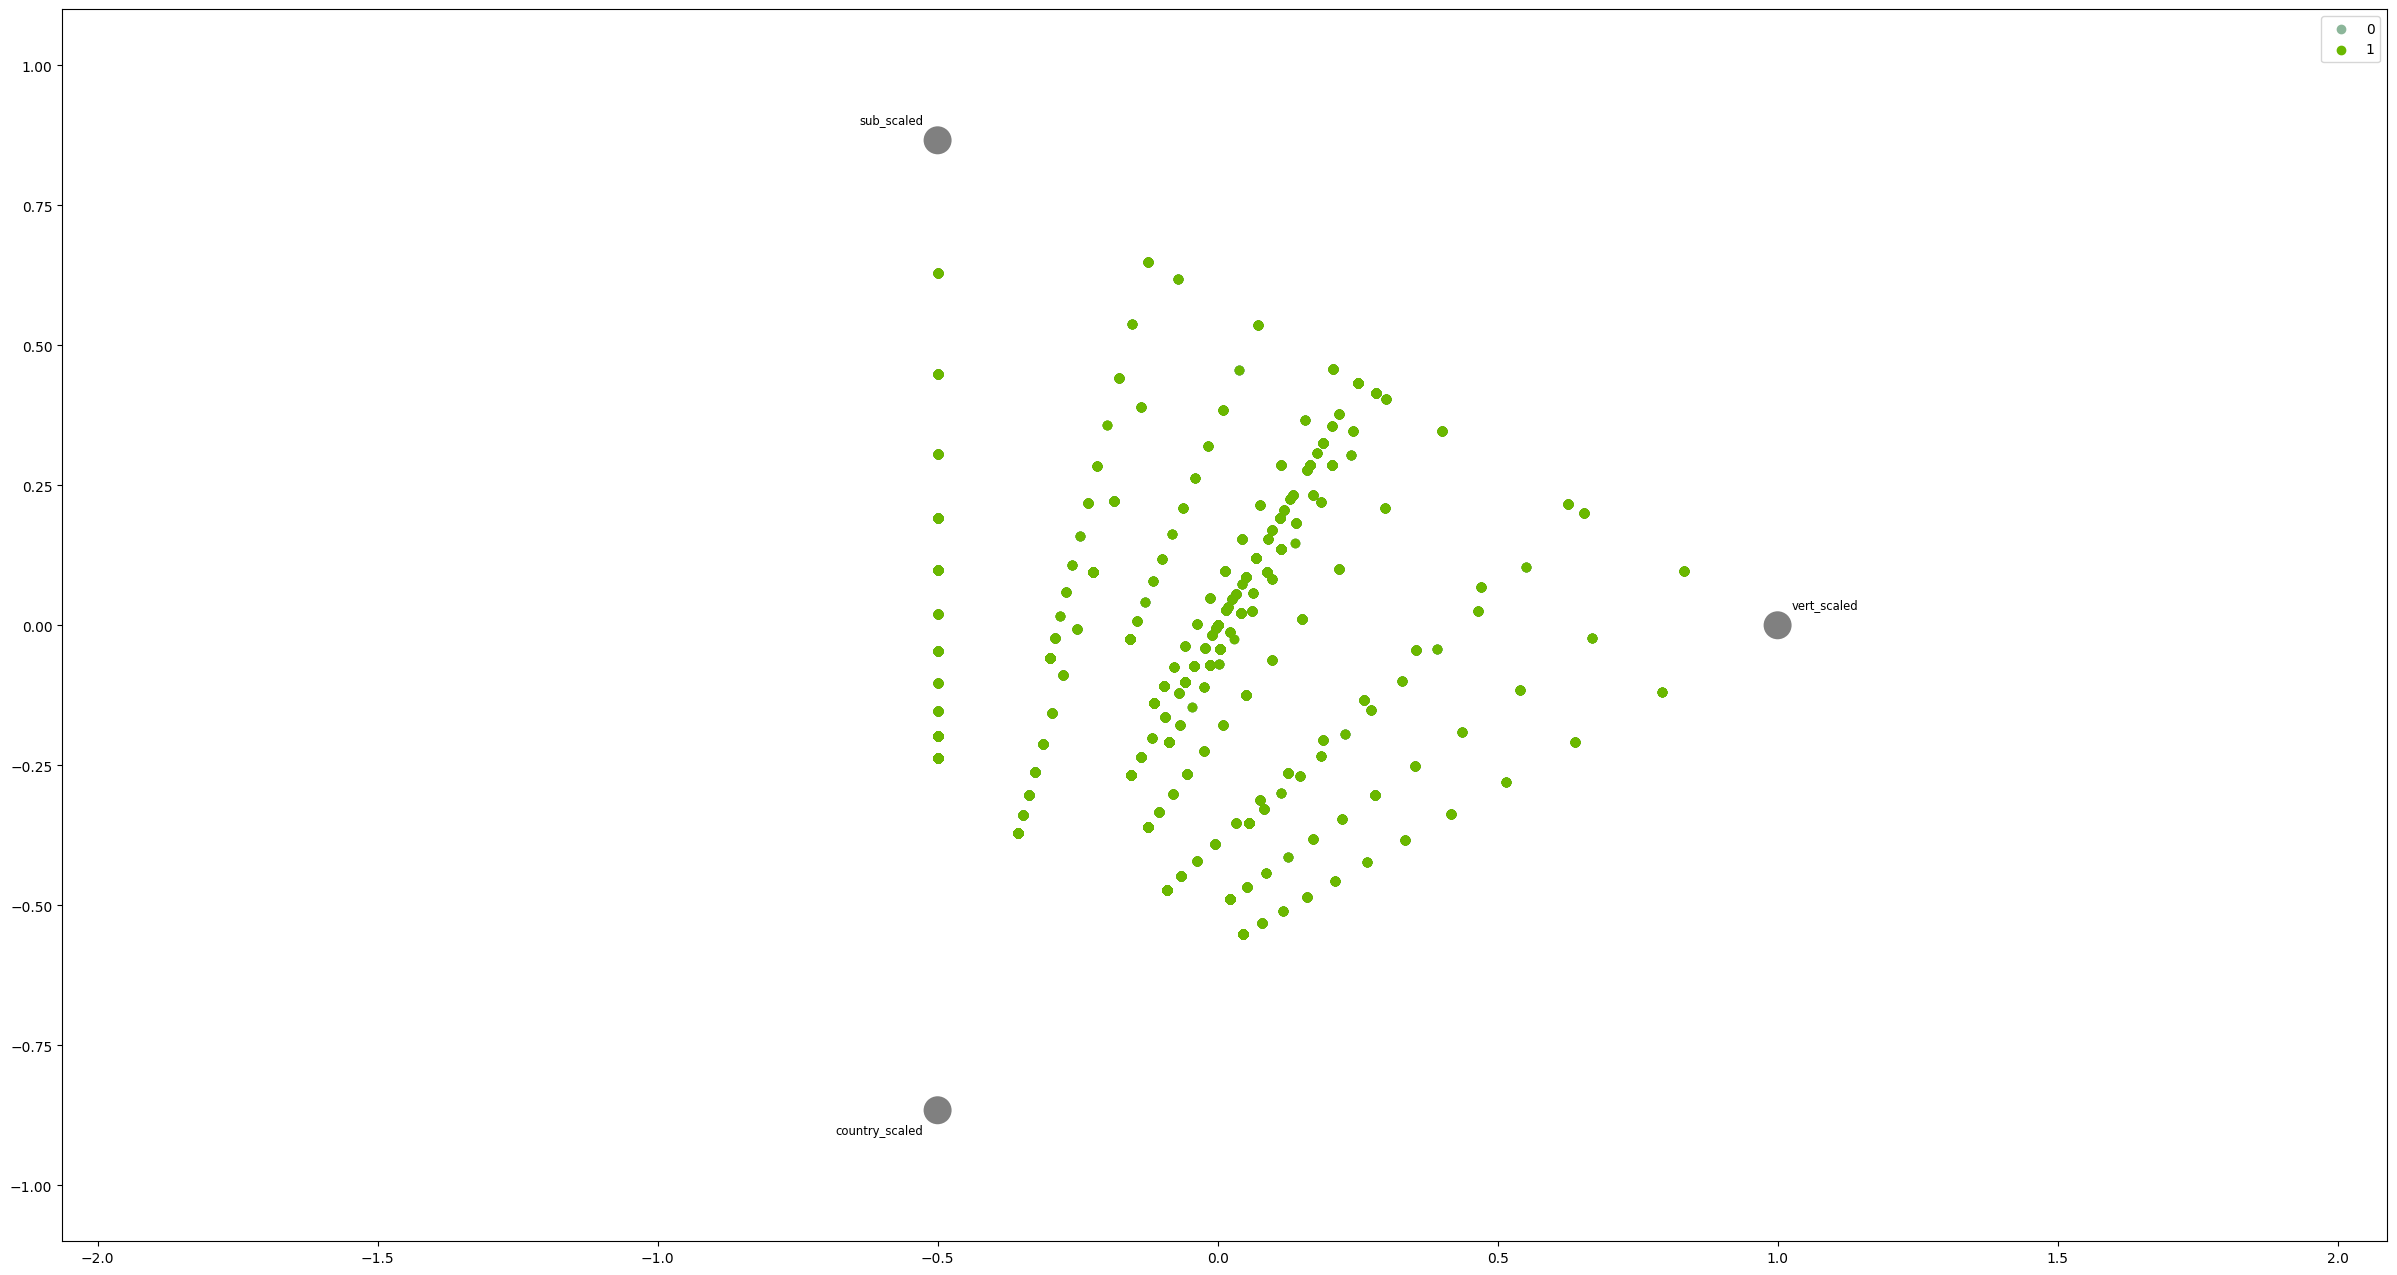

In [93]:
from pandas.plotting import radviz
pyplot.figure(figsize=(30,16))
radviz(data, 'purchase')

In [94]:
#Create feature and target for classification
features_1 = data.drop("purchase", axis=1).values
target_1 = data["purchase"].values

In [95]:
#Split the data for training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, target_1, test_size = 0.3, random_state = 42, stratify = target_1)

In [96]:
data

,purchase,vert_scaled,sub_scaled,country_scaled
0,0,0.428571,0.428571,1.000000
1,1,0.714286,0.714286,1.000000
2,1,0.714286,0.714286,0.636364
3,1,0.714286,0.714286,1.000000
4,0,0.285714,0.857143,0.000000
...,...,...,...,...
27338,1,0.571429,0.000000,1.000000
27339,0,0.142857,0.357143,0.272727
27340,0,0.428571,0.285714,1.000000
27341,1,0.714286,0.214286,1.000000


In [97]:
#Feature selection
data.head(3)

,purchase,vert_scaled,sub_scaled,country_scaled
0,0,0.428571,0.428571,1.000000
1,1,0.714286,0.714286,1.000000
2,1,0.714286,0.714286,0.636364


In [98]:
#X_train has: segment, vert_scaled, sub_scaled, country_scaled
X_train_1[0:3,:]

array([[0.57142857, 0.64285714, 1.        ],
       [0.85714286, 0.78571429, 1.        ],
       [0.14285714, 0.35714286, 0.54545455]])

In [99]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=3) 
fit = test.fit(X_train_1, y_train_1)

In [100]:
fit.scores_

array([ 5.41909276,  7.24163997, 12.50724208])

In [101]:
features = fit.transform(X_train_1)

In [102]:
#Univariate selected 3 best features - vert_scaled, sub_scaled, country_scaled
features[0:3,:]

array([[0.57142857, 0.64285714, 1.        ],
       [0.85714286, 0.78571429, 1.        ],
       [0.14285714, 0.35714286, 0.54545455]])

In [103]:
#Trying to use RFE
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
rf = RFE(model, step=3) 
fit = rf.fit(X_train_1, y_train_1)

In [104]:
fit.n_features_

1

In [105]:
fit.support_

array([False, False,  True])

In [106]:
#RFE selected the same 3 best features - vert_scaled, sub_scaled, country_scaled
fit.ranking_

array([2, 2, 1])

In [107]:
#trying to use PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
fit = pca.fit(X_train_1) 

In [108]:
fit.explained_variance_ratio_ 

array([0.44665487, 0.3733667 , 0.17997843])

In [109]:
fit.components_

array([[ 0.63438637,  0.59918893,  0.4883918 ],
       [ 0.35311007,  0.33741061, -0.87262097],
       [ 0.6876534 , -0.72603492, -0.00246905]])

In [110]:
#Finding feature importance
from sklearn.ensemble import ExtraTreesClassifier

In [111]:
model = ExtraTreesClassifier() 
model.fit(X_train_1, y_train_1) 

ExtraTreesClassifier()

In [112]:
model.feature_importances_

array([0.26670425, 0.32344436, 0.40985139])

In [ ]:
#All feature selection approaches returned the same features to be used for future analysis - vert_scaled, sub_scaled, country_scaled

In [114]:
#Create new feature and target for classification after feature selection done by removing segment. Target is still the same.
target_2 = data["purchase"].values
#data_2 = data.drop("segment", axis=1)
features_2 = data_2.drop("purchase", axis=1).values

In [115]:
#Split the new data for training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, target_2, test_size = 0.3, random_state = 42, stratify = target_2)

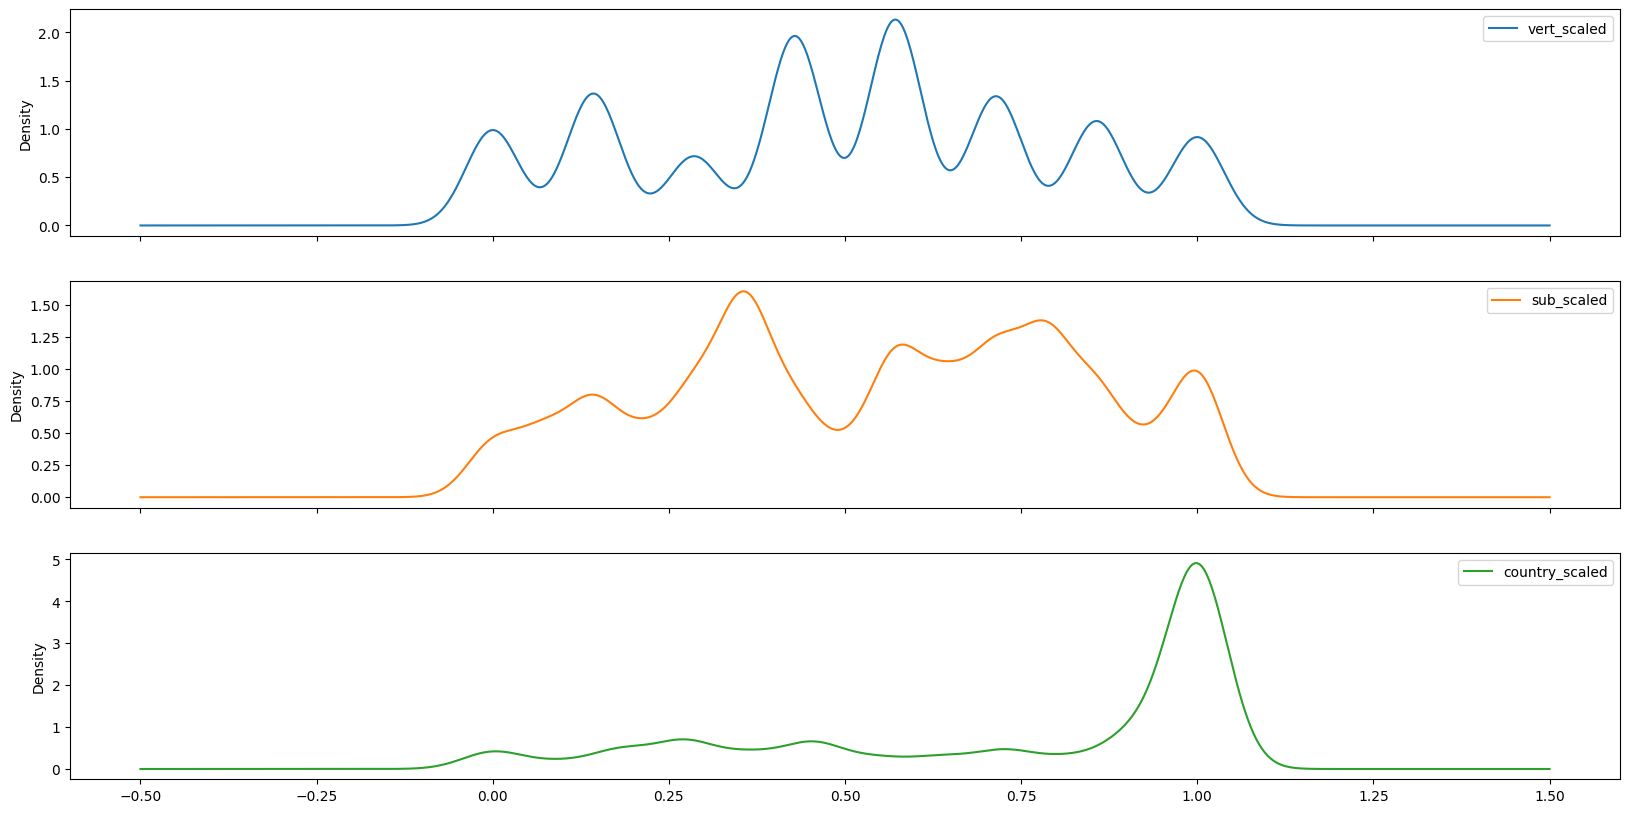

In [116]:
plotting_data_2 = data_2.drop("purchase", axis=1)
plotting_data_2.plot.kde(figsize=(20,10),subplots=True)
pyplot.show()

In [117]:
#Create new feature and target for classification after feature selection done by removing country for the testing. Target is still the same.
target_3 = data["purchase"].values
data_3 = data_2.drop("country_scaled", axis=1)
features_3 = data_2.drop("purchase", axis=1).values

In [118]:
#Split the new data for training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(features_3, target_3, test_size = 0.3, random_state = 42, stratify = target_3)

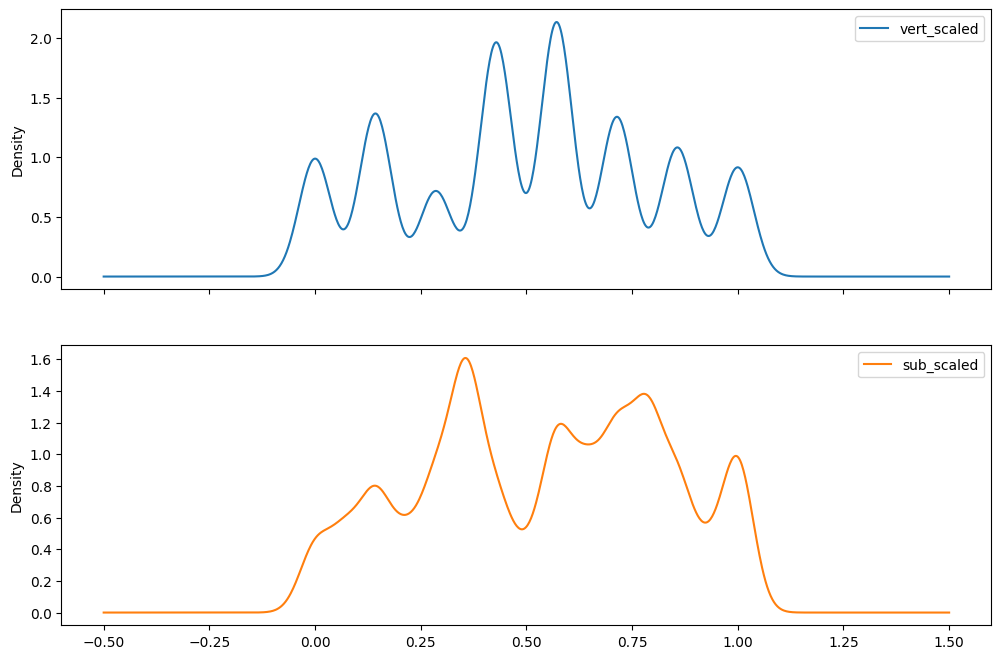

In [119]:
plotting_data_3 = data_3.drop("purchase", axis=1)
plotting_data_3.plot.kde(figsize=(12,8),subplots=True)
pyplot.show()

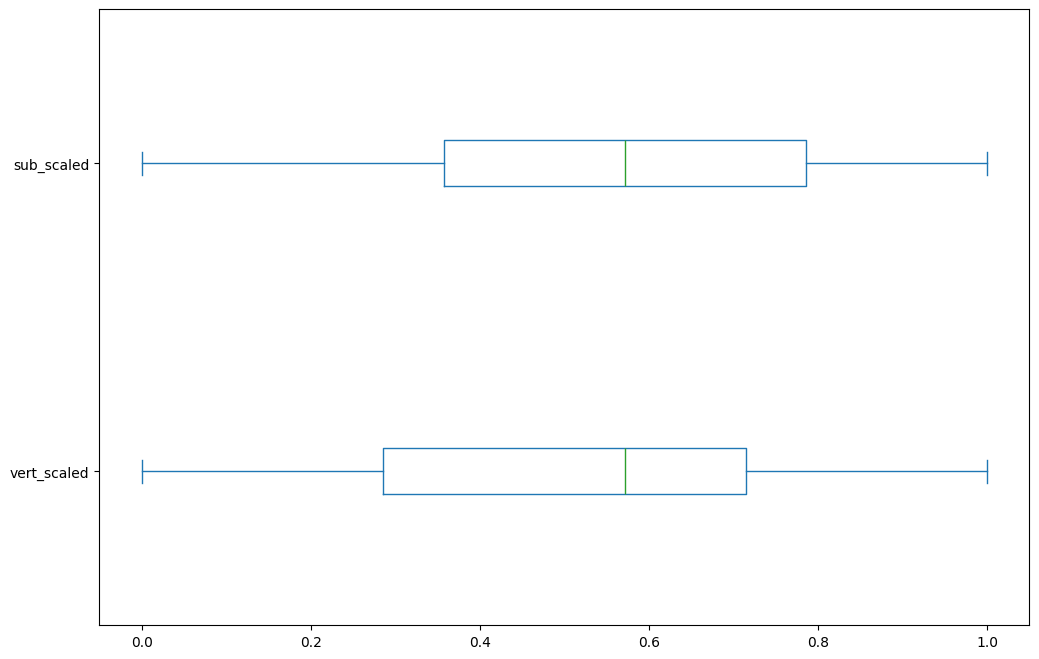

In [120]:
plotting_data_3.plot.box(vert=False, figsize=(12,8))
pyplot.show()

In [58]:
#Doing model comparison

In [121]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

In [122]:
#prepare models 
models = [] 
models.append(("LR", LogisticRegression())) 
models.append(("LDA", LinearDiscriminantAnalysis())) 
models.append(("KNN", KNeighborsClassifier())) 
models.append(("CART", DecisionTreeClassifier())) 
models.append(("NB", GaussianNB())) 
models.append(("SVM", SVC())) 

In [123]:
#Evaluate each model in turn for feature set 1
results_1 = [] 
names_1 = [] 
scoring = "accuracy" 
for name, model in models: 
   kfold = KFold(n_splits=10, random_state=7, shuffle=True) 
   cv_results = cross_val_score(model, X_train_1, y_train_1, cv=kfold, scoring=scoring)
   results_1.append(cv_results)
   names_1.append(name) 
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
   print(msg)

LR: 0.648903 (0.008405)
LDA: 0.648903 (0.008405)
KNN: 0.593887 (0.017421)
CART: 0.648067 (0.008314)
NB: 0.648903 (0.008405)
SVM: 0.648903 (0.008405)


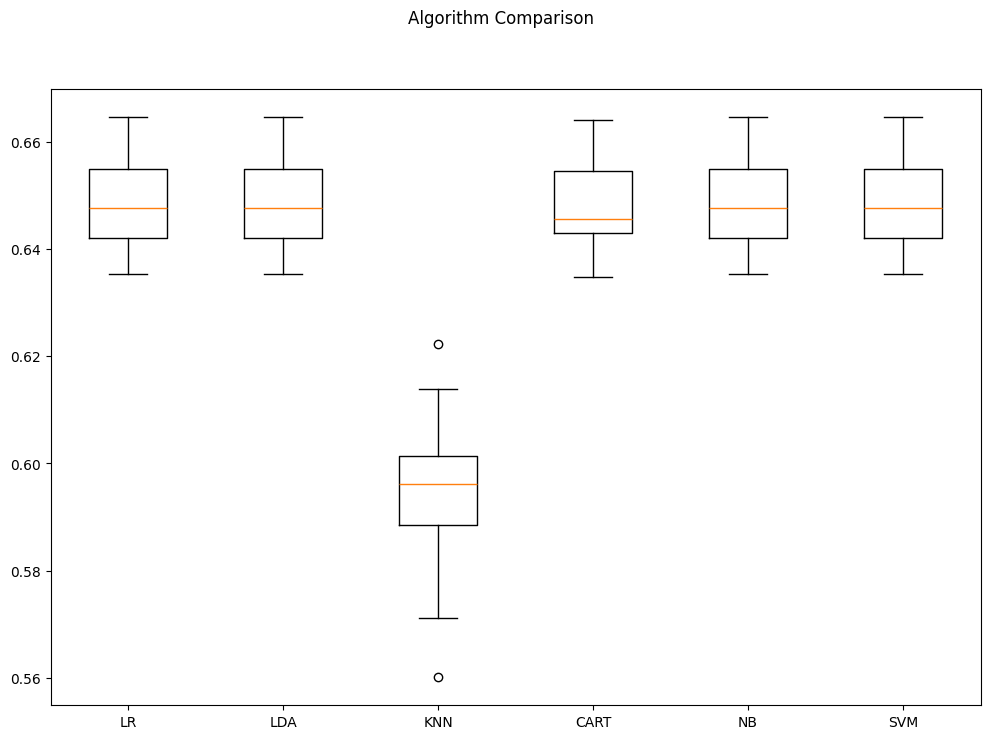

In [124]:
#Boxplot algorithm comparison for feature set 1
fig = pyplot.figure(figsize=(12,8)) 
fig.suptitle("Algorithm Comparison") 
ax = fig.add_subplot(111) 
pyplot.boxplot(results_1) 
ax.set_xticklabels(names_1) 
pyplot.show()

In [63]:
#Evaluate each model in turn for feature set 2
results_2 = [] 
names_2 = [] 
scoring = "accuracy" 
for name, model in models: 
   kfold = KFold(n_splits=10, random_state=7, shuffle=True) 
   cv_results = cross_val_score(model, X_train_2, y_train_2, cv=kfold, scoring=scoring)
   results_2.append(cv_results)
   names_2.append(name) 
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
   print(msg)

LR: 0.648903 (0.008405)
LDA: 0.648903 (0.008405)
KNN: 0.593887 (0.017421)
CART: 0.648067 (0.008314)
NB: 0.648903 (0.008405)
SVM: 0.648903 (0.008405)


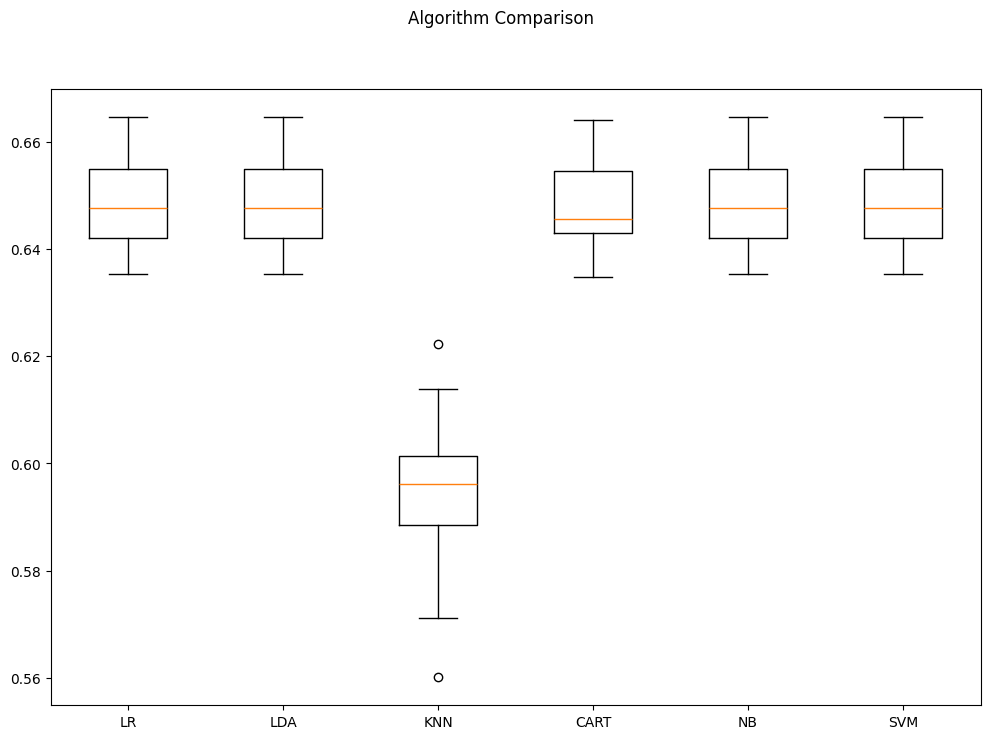

In [64]:
#Boxplot algorithm comparison for feature set 2
fig = pyplot.figure(figsize=(12,8)) 
fig.suptitle("Algorithm Comparison") 
ax = fig.add_subplot(111) 
pyplot.boxplot(results_2) 
ax.set_xticklabels(names_2) 
pyplot.show()

In [ ]:
#Evaluate each model in turn for feature set 3
results_3 = [] 
names_3 = [] 
scoring = "accuracy" 
for name, model in models: 
   kfold = KFold(n_splits=10, random_state=7, shuffle=True) 
   cv_results = cross_val_score(model, X_train_3, y_train_3, cv=kfold, scoring=scoring)
   results_3.append(cv_results)
   names_3.append(name) 
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
   print(msg)

In [ ]:
#Boxplot algorithm comparison for feature set 3
fig = pyplot.figure(figsize=(12,8)) 
fig.suptitle("Algorithm Comparison") 
ax = fig.add_subplot(111) 
pyplot.boxplot(results_3) 
ax.set_xticklabels(names_3) 
pyplot.show()

In [ ]:
#Evaluating 6 different algorithms shows LR, LDA, NB and SVM give the same score for all feature sets
#Selecting LDA to use pipeline for further testing

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
#Create pipeline 
estimators = [] 
estimators.append(("standardize", StandardScaler())) 
estimators.append(("lda", LinearDiscriminantAnalysis())) 
model = Pipeline(estimators)

In [ ]:
#Evaluate pipeline for feature set 1
kfold = KFold(n_splits=10, random_state=7, shuffle=True) 
results = cross_val_score(model, X_train_1, y_train_1, cv=kfold) 
print(results.mean())